## Notebook under construction

## fcNN without hidden layer compared to fcNN with hidden layer

  * This Notebook shows that a fully connected layer without a hidden layer can only learn linar decision boundaries, while a fully connected layer with a hidden layer is able to learn non-linear decision boundaries.
  
  <a href="https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_02/banknote_fcNN_classification.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="open in colab">
</a>
| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_02/banknote_fcNN_classification.ipynb)


#### Banknote data set and classification task:

The following features were extracted from wavelet images of banknotes:

1. variance  (continuous feature) 
2. skewness (continuous feature) 
3. curtosis (continuous feature) 
4. entropy (continuous feature) 
5. class (binary indicating if the banknote is real or fake)

For this analysis we only use 2 features. 

* x1: skewness of wavelet transformed image
* x2: entropy of wavelet transformed image

The goal is to classify each banknote to either "real" (Y=0) or "fake" (Y=1).



In [1]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras 
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import to_categorical 
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Load data from url
from urllib.request import urlopen
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)

(1372, 5)


In [3]:
# Here we use only the two features and the label of the dataset
X=dataset[:,[1,3]]
Y=dataset[:,4]

In [4]:
print(X.shape)
print(Y.shape)

(1372, 2)
(1372,)


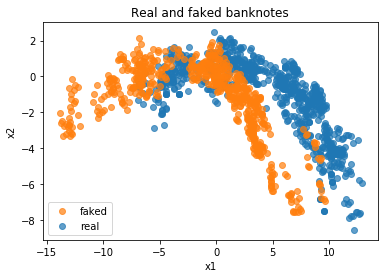

In [5]:
# visualize the data in a 2D feature space. 
idx_f = [np.where(Y==1)]
idx_r = [np.where(Y==0)]
real=plt.scatter(X[idx_r,0],X[idx_r,1], alpha=0.7)
fake=plt.scatter(X[idx_f,0],X[idx_f,1], alpha=0.7)


plt.title("Real and faked banknotes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend((fake, real,),
           ("faked","real"),
           loc='lower left',
           fontsize=10)
plt.show()

You can see that the two classes are more or less separated by a curved boundary.

### fcNN with only one neuron
Let’s try to use a single neuron with a sigmoid activation function (also known as logistic regression) as classification model.

In [6]:
# Definition of the optimizer
sgd = optimizers.SGD(lr=0.15)

In [7]:
# Definition of the network
model = Sequential()
model.add(Dense(1, batch_input_shape=(None, 2),activation='sigmoid'))
# compile model and intitialize weights
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [8]:
# summarize the architecture of the NN along with the number of weights
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Training of the network
history = model.fit(X, Y, 
          epochs=100, 
          batch_size=128,
          verbose=0)

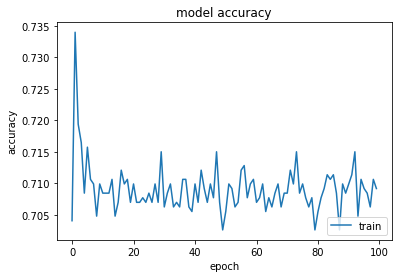

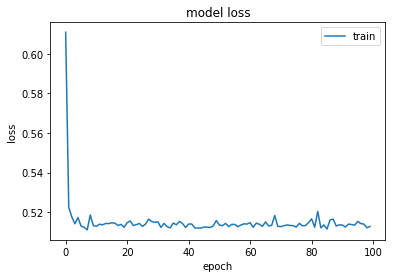

In [10]:
# plot the development of the accuracy and the loss during the training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### Plotting the learned decision boundary
Let's visualize which decision boundary was learned by the fcNN with only one output neuron (and no hidden layer)


In [11]:
# define a grid for the 2D feature space
# predict at each grid point the probability for class 1
x1list = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 100)
x2list = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 100)
X1_grid, X2_grid = np.meshgrid(x1list, x2list)
p=np.array([model.predict(np.reshape(np.array([x1list,x2list]),(1,2))) for x1list,x2list in zip(np.ravel(X1_grid), np.ravel(X2_grid))])
p = p.reshape(X1_grid.shape)

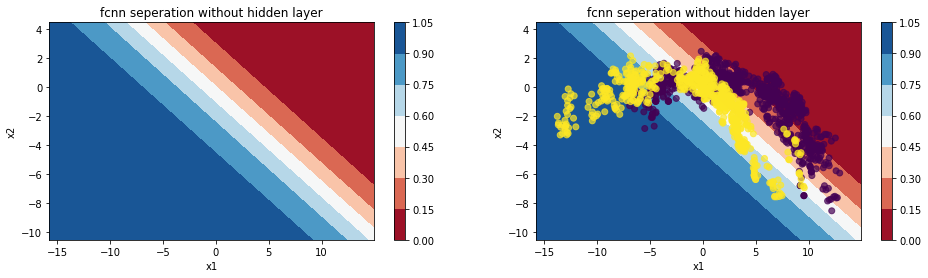

In [12]:
# visualize the predicted probabilities in the 2D feature space
# once without and once with the data points used fro fitting
plt.figure(figsize=(16,4))
plt.subplot(1,2,(1))
cp = plt.contourf(X1_grid, X2_grid, p,cmap='RdBu')
plt.colorbar(cp)
plt.title('fcnn seperation without hidden layer')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1,2,(2))
cp = plt.contourf(X1_grid, X2_grid, p,cmap='RdBu')
plt.colorbar(cp)
plt.title('fcnn seperation without hidden layer')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[:,0],X[:,1],c=Y,alpha=0.7)

plt.savefig('ch02_7.pdf')

### fcNN with one hidden layer 
Here we use a fcNN with a hidden layer that contains 8 neurons.
The output layer has 2 neurons - each giving the probability for one of the two classes.



In [13]:
# Definition of the network
model = Sequential()
model.add(Dense(8, batch_input_shape=(None, 2),activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [15]:
# one-hot encoding
Y_c=to_categorical(Y,2)

In [16]:
# Training of the network
history = model.fit(X, Y_c, 
          epochs=100, 
          batch_size=128,
          verbose=0)

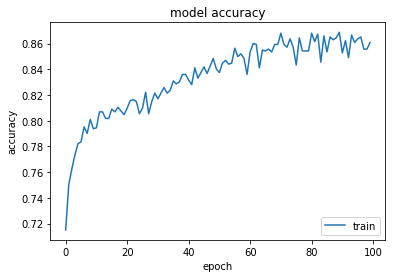

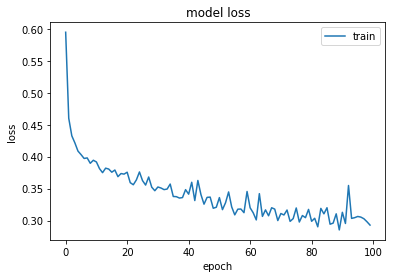

In [17]:
# plot the development of the accuracy and loss during the training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()


### Plotting the learned decision boundary
Let's visualize which decision boundary was learned by the fcNN which contains a hidden layer.



In [18]:
# define a grid for the 2D feature space
# predict at each grid point the probability for class 1
x1list = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 100)
x2list = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 100)
X1_grid, X2_grid = np.meshgrid(x1list, x2list)
p = np.array([model.predict(np.reshape(np.array([x1list,x2list]),(1,2))) for x1list,x2list in zip(np.ravel(X1_grid), np.ravel(X2_grid))])
p = p[:,:,1] # pick p for class = 1
p = p.reshape(X1_grid.shape)
  

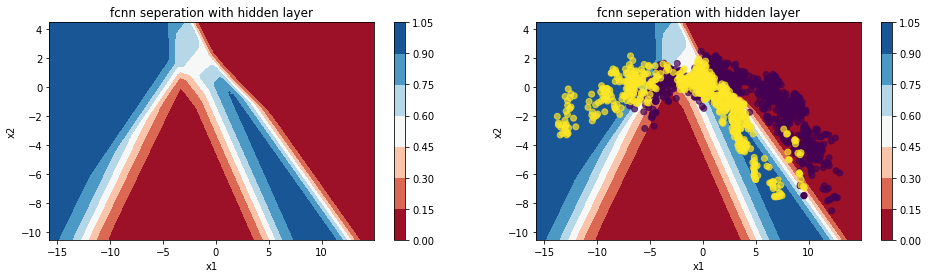

In [19]:
# visualize the predicted probabilities in the 2D feature space
# once without and once with the data points used fro fitting
# visualize the predicted probabilities in the 2D feature space
# once without and once with the data points used fro fitting
plt.figure(figsize=(16,4))
plt.subplot(1,2,(1))
cp = plt.contourf(X1_grid, X2_grid, p,cmap='RdBu')
plt.colorbar(cp)
plt.title('fcnn seperation with hidden layer')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1,2,(2))
cp = plt.contourf(X1_grid, X2_grid, p,cmap='RdBu')
plt.colorbar(cp)
plt.title('fcnn seperation with hidden layer')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[:,0],X[:,1],c=Y,alpha=0.7)

plt.savefig('ch02_9.pdf')